In [30]:
import pandas as pd
import numpy as np

file_path = "../../data/processed/yp_competitors_rws_0001_0050_complete.csv"
df = pd.read_csv(file_path)
df.head()

,alias,ratingValue,dataPublished,description,author,sentiment,word_count,sent_count,chr_count,avg_word_len,...,ratio_content,sent_tokens,word_tokens_doc,norm_tokens_doc,word_tokens,norm_tokens,sent_topics,topic_mode,topic_list,svm_classifier
0,kimos-maui-lahaina,5,2019-01-06,I stumbled across this great restaurant overlo...,Bella L.,1,135,11,664,4.022222,...,0.674074,['I stumbled across this great restaurant over...,"[('I', 'stumbled', 'across', 'this', 'great', ...","[('stumbl', 'across', 'great', 'restaur', 'ove...","['I', 'stumbled', 'across', 'this', 'great', '...","['stumbl', 'across', 'great', 'restaur', 'over...","[(5, 0.181669682264328), (2, 0.186504259705543...",1,"5,2,1,3,6,3,2,0,6,1,5",1
1,kimos-maui-lahaina,5,2019-01-04,Excellent view on the ocean at sunset.\nExcell...,Rachou A.,1,36,5,160,3.611111,...,0.638889,"['Excellent view on the ocean at sunset.', 'Ex...","[('Excellent', 'view', 'on', 'the', 'ocean', '...","[('excel', 'view', 'ocean', 'sunset'), ('excel...","['Excellent', 'view', 'on', 'the', 'ocean', 'a...","['excel', 'view', 'ocean', 'sunset', 'excel', ...","[(6, 0.146974578499794), (3, 0.139927998185157...",6,"6,3,8,6,9",1
2,kimos-maui-lahaina,3,2018-12-25,This place was not what the reviews portrayed ...,Ozzetta B.,0,275,14,1229,3.596364,...,0.567273,['This place was not what the reviews portraye...,"[('This', 'place', 'was', 'not', 'what', 'the'...","[('place', 'review', 'portray'), ('starter', '...","['This', 'place', 'was', 'not', 'what', 'the',...","['place', 'review', 'portray', 'starter', 'wal...","[(6, 0.15684203803539276), (8, 0.2266744673252...",8,"6,8,2,5,4,8,3,9,8,8,8,1,7,6",0
3,kimos-maui-lahaina,2,2018-12-08,We were excited to repeat our Keoki's (in Kaua...,Arleen C.,0,475,34,2226,3.783158,...,0.604211,"[""We were excited to repeat our Keoki's (in Ka...","[('We', 'were', 'excited', 'to', 'repeat', 'ou...","[('excit', 'repeat', 'keoki', ""'s"", 'kauai', '...","['We', 'were', 'excited', 'to', 'repeat', 'our...","['excit', 'repeat', 'keoki', ""'s"", 'kauai', 'l...","[(2, 0.1735130101442337), (4, 0.13328838348388...",2,"2,4,9,0,5,3,7,1,0,4,0,5,5,8,6,9,2,8,6,2,2,1,6,...",1
4,kimos-maui-lahaina,3,2018-11-29,"If you're looking for a tourist spot, this is ...",Carol B.,0,168,10,776,3.732143,...,0.636905,"[""If you're looking for a tourist spot, this i...","[('If', 'you', ""'re"", 'looking', 'for', 'a', '...","[(""'re"", 'look', 'tourist', 'spot'), ('unfortu...","['If', 'you', ""'re"", 'looking', 'for', 'a', 't...","[""'re"", 'look', 'tourist', 'spot', 'unfortun',...","[(6, 0.1469745934009552), (9, 0.20430350303649...",6,"6,9,8,6,4,0,5,3,1,9",1


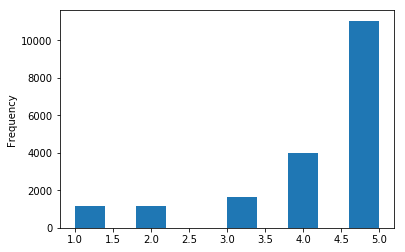

In [32]:
df.ratingValue.plot('hist')

In [2]:
print(df.iloc[95, :].norm_tokens_doc)

[('came', 'back', 'kimo', "'s", 'disappoint', 'find', 'longer', 'lobster', 'slider', 'truffl', 'chip', 'happi', 'hour', 'menu'), ("'s", 'pretti', 'much', 'sister', 'would', 'alway', 'go', 'visit', 'maui'), ('waitress', 'said', 'replac', 'menu', 'option', 'buffalo', 'chicken', 'bite'), ('order', "n't", 'anyth', 'special', 'world'), ('typic', "'d", 'get', 'place'), ('also', 'got', 'macadamia', 'crust', 'calamari', '...', '.still', "n't", 'get', 'macadamia', 'part'), ('also', 'order', 'avocado', 'poke', 'stack'), ('poke', "n't", 'realli', 'cold'), ("n't", 'like', 'poke', "n't", 'cold'), ('sister', 'get', 'cheeseburg', 'time'), ('huge', 'looked/smel', 'realli', 'good'), ('could', "n't", 'even', 'finish'), ('said', 'juici', 'tasti'), ('place', 'nice', 'ocean-front', 'spot'), ('pretti', 'pricey', 'though'), ('went', 'cafe', 'lei', 'dune', 'bill', 'came', 'significantli', 'le', 'even', 'though', 'order', "'ve", 'left', 'review', 'photo', 'order', 'see'), ('unless', 'bring', 'back', 'lobster',

In [3]:
# fix column type error
from ast import literal_eval

fix_columns_list = ['sent_tokens', 'word_tokens_doc', 'norm_tokens_doc', 'word_tokens', 'norm_tokens']
for column in fix_columns_list:
    df[column] = df[column].apply(lambda x: literal_eval(x))
df.loc[:5, fix_columns_list]

,sent_tokens,word_tokens_doc,norm_tokens_doc,word_tokens,norm_tokens
0,[I stumbled across this great restaurant overl...,"[(I, stumbled, across, this, great, restaurant...","[(stumbl, across, great, restaur, overlook, oc...","[I, stumbled, across, this, great, restaurant,...","[stumbl, across, great, restaur, overlook, oce..."
1,"[Excellent view on the ocean at sunset., Excel...","[(Excellent, view, on, the, ocean, at, sunset,...","[(excel, view, ocean, sunset), (excel, food), ...","[Excellent, view, on, the, ocean, at, sunset, ...","[excel, view, ocean, sunset, excel, food, fres..."
2,[This place was not what the reviews portrayed...,"[(This, place, was, not, what, the, reviews, p...","[(place, review, portray), (starter, walk, sta...","[This, place, was, not, what, the, reviews, po...","[place, review, portray, starter, walk, stair,..."
3,[We were excited to repeat our Keoki's (in Kau...,"[(We, were, excited, to, repeat, our, Keoki, '...","[(excit, repeat, keoki, 's, kauai, lovefest, s...","[We, were, excited, to, repeat, our, Keoki, 's...","[excit, repeat, keoki, 's, kauai, lovefest, si..."
4,"[If you're looking for a tourist spot, this is...","[(If, you, 're, looking, for, a, tourist, spot...","[('re, look, tourist, spot), (unfortun, could,...","[If, you, 're, looking, for, a, tourist, spot,...","['re, look, tourist, spot, unfortun, could, n'..."
5,"[What an amazing restaurant, especially the vi...","[(What, an, amazing, restaurant, ,, especially...","[(amaz, restaur, especi, view, dinner), (dine,...","[What, an, amazing, restaurant, ,, especially,...","[amaz, restaur, especi, view, dinner, dine, wa..."


## Document is Sentences

In [41]:
# X is sents, y is sentiments that generated by doc(len(lists) * [sent]).
X = list(chain(*df.sent_tokens))
doc_sentiment = []
for sentiment, sents in zip(df.sentiment, df.sent_tokens):
    doc_sents_temp = [sentiment] * len(sents)
    doc_sentiment.append(doc_sents_temp)
y = list(chain(*doc_sentiment))
print(len(X), len(y))


136033 136033


In [5]:
from itertools import chain
df.sent_tokens[0]

['I stumbled across this great restaurant overlooking the ocean for lunch during my vacation to Maui.',
 'I did not have high expectations for this place, but boy did it blow me out of the water.',
 "The fish and chips is some of the best I've ever had (and I've had lots, including from London).",
 'I highly recommend it.',
 'Also, the turkey bacon sandwich was SO good.',
 'In terms of drinks, I highly recommend the Pacific Paradise drink!',
 'So delicious and tropical!',
 'I also really enjoyed the Lahaina Lemonade.',
 'Service was really great!',
 'I wish I remembered the waitresses name because she was truly awesome and recommend the best stuff.',
 'She was blonde and had cute sunglasses.']

In [43]:

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
sent_tokens_tfmd = cv.fit_transform(chain(*df.sent_tokens))
sent_tokens_tfmd

<136033x21265 sparse matrix of type '<class 'numpy.int64'>'
	with 757696 stored elements in Compressed Sparse Row format>

In [44]:
tfidf = TfidfTransformer()
tfidf.fit_transform(sent_tokens_tfmd)

<136033x21265 sparse matrix of type '<class 'numpy.float64'>'
	with 757696 stored elements in Compressed Sparse Row format>

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier

pipe = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=10, tol=0.05)),
])

pipe.fit(X, y)
predicted = pipe.predict(X)
print(np.mean(predicted == y))

0.7477450324553601


## Document is Reviews

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

X = df.norm_tokens_doc.apply(lambda x: ' '.join(chain(*x)))
y = df.sentiment


In [25]:
from sklearn.linear_model import SGDClassifier

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=100, max_iter=10, tol=0.05))])

pipe.fit(X, y)
sgd_pred = pipe.predict(X)
print(np.mean(sgd_pred == y))

0.8818611987381704


In [ ]:
pipe.predict()

In [27]:
from sklearn.naive_bayes import MultinomialNB
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

pipe.fit(X, y)
mnb_pred = pipe.predict(X)
print(np.mean(mnb_pred == y))

0.8476866456361725


In [29]:
results = []
for i in [sgd_pred, mnb_pred]:
    acc = accuracy_score(y, i)
    pre = precision_score(y, i)
    flc = f1_score((y, i)
    rec = recall_score(y, i, pos_label=1)
    results.append((acc, pre, flc, rec))
pd.DataFrame(results)

,0,1,2,3
0,0.881861,0.873036,0.930098,0.995140
1,0.847687,0.838706,0.912001,0.999334


In [22]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report

print(classification_report(y, predicted))

              precision    recall  f1-score   support

           0       0.96      0.46      0.62      3998
           1       0.87      1.00      0.93     15022

   micro avg       0.88      0.88      0.88     19020
   macro avg       0.92      0.73      0.77     19020
weighted avg       0.89      0.88      0.86     19020



In [33]:
df['svm_classifier'] = pd.Series(predicted)

In [34]:
df.head()

,alias,ratingValue,dataPublished,description,author,sentiment,word_count,sent_count,chr_count,avg_word_len,...,ratio_content,sent_tokens,word_tokens_doc,norm_tokens_doc,word_tokens,norm_tokens,sent_topics,topic_mode,topic_list,svm_classifier
0,kimos-maui-lahaina,5,2019-01-06,I stumbled across this great restaurant overlo...,Bella L.,1,135,11,664,4.022222,...,0.674074,[I stumbled across this great restaurant overl...,"[(I, stumbled, across, this, great, restaurant...","[(stumbl, across, great, restaur, overlook, oc...","[I, stumbled, across, this, great, restaurant,...","[stumbl, across, great, restaur, overlook, oce...","[(5, 0.3112545907497406), (5, 0.20203207433223...",5,"5,5,9,5,3,4,5,5,5,9,5",1
1,kimos-maui-lahaina,5,2019-01-04,Excellent view on the ocean at sunset.\nExcell...,Rachou A.,1,36,5,160,3.611111,...,0.638889,"[Excellent view on the ocean at sunset., Excel...","[(Excellent, view, on, the, ocean, at, sunset,...","[(excel, view, ocean, sunset), (excel, food), ...","[Excellent, view, on, the, ocean, at, sunset, ...","[excel, view, ocean, sunset, excel, food, fres...","[(5, 0.24188750982284546), (5, 0.1962578445672...",5,"5,5,3,5,5",1
2,kimos-maui-lahaina,3,2018-12-25,This place was not what the reviews portrayed ...,Ozzetta B.,0,275,14,1229,3.596364,...,0.567273,[This place was not what the reviews portrayed...,"[(This, place, was, not, what, the, reviews, p...","[(place, review, portray), (starter, walk, sta...","[This, place, was, not, what, the, reviews, po...","[place, review, portray, starter, walk, stair,...","[(5, 0.19056889414787292), (5, 0.2658553421497...",5,"5,5,1,1,1,7,5,5,5,0,5,5,2,5",0
3,kimos-maui-lahaina,2,2018-12-08,We were excited to repeat our Keoki's (in Kaua...,Arleen C.,0,475,34,2226,3.783158,...,0.604211,[We were excited to repeat our Keoki's (in Kau...,"[(We, were, excited, to, repeat, our, Keoki, '...","[(excit, repeat, keoki, 's, kauai, lovefest, s...","[We, were, excited, to, repeat, our, Keoki, 's...","[excit, repeat, keoki, 's, kauai, lovefest, si...","[(5, 0.18351130187511444), (5, 0.2023473381996...",5,"5,5,2,6,5,0,5,5,8,5,5,5,7,7,5,5,5,5,5,5,5,7,9,...",1
4,kimos-maui-lahaina,3,2018-11-29,"If you're looking for a tourist spot, this is ...",Carol B.,0,168,10,776,3.732143,...,0.636905,"[If you're looking for a tourist spot, this is...","[(If, you, 're, looking, for, a, tourist, spot...","[('re, look, tourist, spot), (unfortun, could,...","[If, you, 're, looking, for, a, tourist, spot,...","['re, look, tourist, spot, unfortun, could, n'...","[(5, 0.21350185573101044), (5, 0.1800063550472...",5,"5,5,2,6,9,5,9,0,5,5",1


In [35]:
df.to_csv("../../data/processed/yp_competitors_rws_0001_0050_complete.csv", index=False)

In [36]:
import os
os.cpu_count()

8